In [138]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [139]:
#Dimensiones de la imagen a crear
ancho = 350
alto = 350

In [140]:
#Crea una imagen de un único plano
# Al ser un único plano, se interpreta como nivel de gris (0 negro, 255 blanco)
gris_img = np.zeros((alto,ancho,1), dtype = np.uint8)
#Muestra dimensiones de la imagen creada
print(gris_img.shape)

(350, 350, 1)


Tarea 1: Crear una imagen con la textura de tablero de ajedrez:

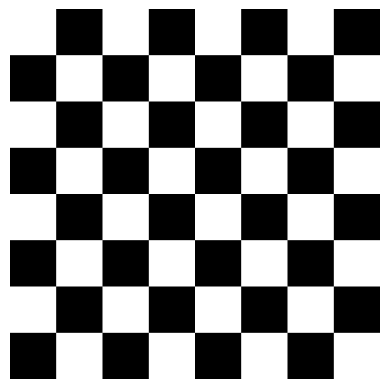

In [141]:
#Dimensiones del tablero de ajedrez
ancho = 400
alto = 400

gris_img = np.zeros((alto,ancho,1), dtype = np.uint8)
#Modifica un par de zonas rectangulares de la imagen

celda =50
for fila in range(0, alto, celda):
    for columna in range(0, ancho, celda):
        if (fila // celda + columna // celda) % 2 == 0:
            gris_img[fila:fila+celda, columna:columna+celda] = 255
        else:
            gris_img[fila:fila+celda, columna:columna+celda] = 0
#Muestra la imagen con matplotlib
#Al ser un plano, recordar especificar que el mapa de color usado es de grises
plt.imshow(gris_img, cmap='gray') #Te animo a probar a eliminar la especificación del mapa de color
plt.axis('off')
plt.show()

TAREA 2: Crear una imagen estilo Mondrian

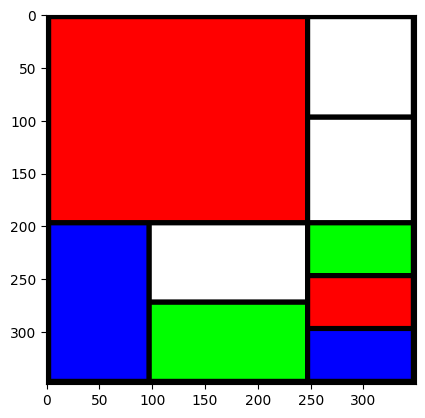

In [142]:
color_img = np.zeros((350, 350, 3), dtype=np.uint8)

# Rectángulos laterales blancos
color_img[5:95, 250:345] = 255
color_img[100:195, 250:345] = 255

# Rectángulos blanco y verde en la parte inferior central
color_img[200:270, 100:245] = color_img[275:345, 100:245, 1] = 255

# Rectángulos de la esquina inferior derecha
color_img[200:245, 250:345, 1] = color_img[250:295, 250:345, 0] = color_img[300:345, 250:345, 2] = 255

# Cuadrado rojo en la parte central
color_img[5:195, 5:245, 0] = 255

# Cuadrado azul en la parte inferior izquierda
color_img[200:345, 5:95, 2] = 255

# Muestra la imagen
plt.imshow(color_img)
#plt.axis('off')
plt.show()

TAREA 3: Hacer uso de las funciones de dibujo de OpenCV

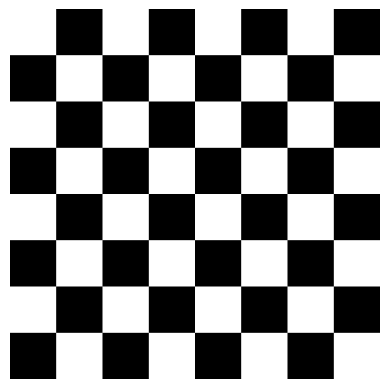

In [143]:
#Dimensiones del tablero de ajedrez
ancho = 400
alto = 400

#Crea una imagen con tres planos
tablero = np.zeros((alto,ancho,1), dtype = np.uint8)

# Tamaño de cada celda
celda = 50

# Dibujar las celdas con OpenCV
for fila in range(0, alto, celda):
    for columna in range(0, ancho, celda):
        # Alternar entre blanco y negro
        if (fila // celda + columna // celda) % 2 == 0:
            color = 255  # Blanco     
        else:
            color = 0        # Negro
        
        # Definir esquinas de la celda
        top_left = (columna, fila)
        bottom_right = (columna + celda, fila + celda)
        
        # Dibujar el rectángulo (celda)
        cv2.rectangle(tablero, top_left, bottom_right, color, -1)

# Mostrar la imagen con matplotlib
plt.imshow(cv2.cvtColor(tablero, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


TAREA 4: Modificar un plano de la imagen

In [144]:
# Iniciar la captura de video
vid = cv2.VideoCapture(0)

while True:
    # Leer fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Canales
        b = frame[:, :, 0] # Azul
        g = frame[:, :, 1] # Verde
        r = frame[:, :, 2] # Rojo


        # efecto de difuminado con blur
        green = cv2.GaussianBlur(g, (45, 55), 0)

        # detección de bordes en el plano azul usando Sobel
        blue = cv2.Sobel(b, cv2.CV_64F, 1, 0, ksize=5)
        blue = np.uint8(np.absolute(blue))

        # Concatenar los tres planos
        collage = np.vstack((r, green, blue))

        # Dimensiones de la imagen de entrada
        h, w, _ = frame.shape

        # Mostrar el collage
        cv2.imshow('RGB', cv2.resize(collage, (int(w * 0.3), int(h)), cv2.INTER_NEAREST))
    
    # Detenemos pulsando ESC
    if cv2.waitKey(20) == 27:
        break

# Liberar el objeto de captura
vid.release()
# Destruir todas las ventanas
cv2.destroyAllWindows()

TAREA 5: Destacar tanto el píxel con el color más claro como con el color más oscuro de una imagen

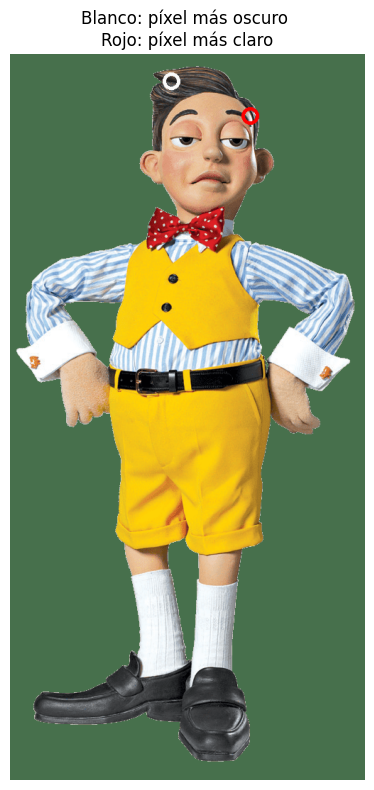

In [145]:

# Cargar la imagen y convertir a escala de grises
image = cv2.imread('../P1/stingy.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Pixeles y coordenadas de los puntos mas claros y oscuros
pixel_oscuro, pixel_claro, coordenada_oscura, coordenada_clara = cv2.minMaxLoc(gray_image)

# Dibujar círculos (imagen, coordenada, radio circulo, color del circulo, grosor circulo)
cv2.circle(image, coordenada_oscura, 10, (250, 250, 250), 3)  # Píxel más oscuro en blanco 
cv2.circle(image, coordenada_clara, 10, (0, 0, 255), 3)  # Píxel más claro en verde

# Mostrar resultado
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convertir a RGB 
plt.title("Blanco: píxel más oscuro \nRojo: píxel más claro")
plt.axis('off')

plt.tight_layout()
plt.show()

TAREA 6: Hacer una propuesta pop art con la entrada de la cámara web o vídeo

In [146]:
# Inicializar captura de video
vid = cv2.VideoCapture(0)

# Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Fuerzo a mitad de resolución
w = int(w / 2)
h = int(h / 2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

# Imagen collage 2x original (4 secciones)
collage = np.zeros((h * 2, w * 2, 3), dtype=np.uint8)

# Definir regiones en el collage
tl = collage[0:h, 0:w]  # Top-left
tr = collage[0:h, w:w + w]  # Top-right
bl = collage[h:h + h, 0:w]  # Bottom-left
br = collage[h:h + h, w:w + w]  # Bottom-right

while True:
    # Leer el fotograma
    ret, frame = vid.read()

    # Redimensionar el frame
    frame = cv2.resize(frame, (w, h), cv2.INTER_NEAREST)

    if ret:
        # Separamos canales de color
        r = frame[:, :, 2]
        g = frame[:, :, 1]
        b = frame[:, :, 0]

        # Top-left: Imagen original en escala de grises
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        tl[:, :, 0] = gray_frame
        tl[:, :, 1] = gray_frame
        tl[:, :, 2] = gray_frame

        # Top-right: Imagen con inversión de colores
        tr[:, :, 0] = 255 - b
        tr[:, :, 1] = 255 - g
        tr[:, :, 2] = 255 - r

        # Bottom-left: Imagen con colores saturados
        saturated_frame = cv2.addWeighted(frame, 1.5, np.zeros_like(frame), 0, 0)
        bl[:, :, :] = saturated_frame

        # Bottom-right: Imagen en sepia
        sepia_filter = np.array([[0.272, 0.534, 0.131],
                                 [0.349, 0.686, 0.168],
                                 [0.393, 0.769, 0.189]])
        sepia_frame = cv2.transform(frame, sepia_filter)
        sepia_frame = np.clip(sepia_frame, 0, 255)
        br[:, :, :] = sepia_frame

        # Mostrar el collage de imágenes con diferentes efectos
        cv2.imshow('Pop Art Collage', collage)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura y cierra las ventanas
vid.release()
cv2.destroyAllWindows()
